# NumPy introduction and statistics in python with sciPy


**www.numpy.org**

NumPy is the fundamental package for scientific computing with Python.

#### Highlights

* a powerful N-dimensional array object
* Efficient, broadcasting functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities


## Why NumPy?

* NumPy arrays is faster than standard python lists
* NumPy functions allows to write many operations with much less code
* NumPy functions are faster than naive Python implementation
* Great collection of mathematical functions available (numpy, scipy, sympy)

## How to start?

In [5]:
# loading numpy module
import numpy as np

## The heart of NumPy: array

NumPy's main object is the **homogeneous** multidimensional array.

Arrays are very efficient for operations with large numerical data and in general outperform standard Python lists.

In [6]:
my_array = np.array([[1.,2.,3.],[4.,5.,6.]])
print("my_array:\n", my_array)
print("my_array dimentions:", my_array.shape)
print("my_array number of elements:", my_array.size)
print("my_array type of elements", my_array.dtype)

my_array:
 [[1. 2. 3.]
 [4. 5. 6.]]
my_array dimentions: (2, 3)
my_array number of elements: 6
my_array type of elements float64


One great functionnality of numpy arrays is that it is painfully easy to perform an operation over the entirety of the elements in the array :

In [7]:
my_result =  my_array * 3 # multiply by 3 all elements in the array

#compare with a native python equivalent :
my_list=[[1.,2.,3.],[4.,5.,6.]]
my_result2 = [[0,0,0],[0,0,0]]
for i  in range(len(my_list)):
    for j in range(len(my_list[i])):
        my_result2[i][j] = my_list[i][j] * 3
        

Numpy is also able to make the most out of the constraint of homogeneity in the array data to provide amazing speed-ups :

In [15]:
from time import time
native_data = [x for x in range(10**7)]
numpy_data = np.array(native_data)

t0 = time()
numpy_data *= 3
t1 = time()
numpyTime = t1-t0

t0 = time()
native_data = [ x*3 for x in native_data ]
t1 = time()
nativeTime = t1-t0

print("native timing :",nativeTime)
print("numpy timing :",numpyTime)
print("numpy acceleration factor :" , nativeTime / numpyTime )

native timing : 0.514258861541748
numpy timing : 0.00655055046081543
numpy acceleration factor : 78.50620564149227


So, let's familiarize ourselves with the numpy array.

## How to create  NumPy array?

### Creating arrays from lists

In [78]:
# one dimentional array
my_array = np.array([1,2,3])
print("my_array:", type(my_array), my_array)

my_array: <class 'numpy.ndarray'> [1 2 3]


In [79]:
# two dimentional array
my_array = np.array([[1,2,3],[4,5,6]])
print("my_array:", type(my_array))
print(my_array)

my_array: <class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


### Creating arrays with functions

In [81]:
# array filled with zeroes
my_array = np.zeros((3,5)) # ( number of rows , number of columns )
print(my_array)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [82]:
# array filled with ones
my_array = np.ones((4,2))
print(my_array)

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]


In [20]:
# array filled with desired number
my_array = np.full((2,3), 42)
print(my_array)

[[42 42 42]
 [42 42 42]]


In [19]:
## identity matrix
my_array = np.eye(4,4,0) 
# the first 2 arguments give the matrix dimensions and the 3rd argument specify where the main diagnoal will be
print(my_array)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [21]:
my_array = np.random.rand(2,2) # random numbers from a uniform distribution between 0.0 and 1.0
print(my_array)

[[0.2066392  0.5245414 ]
 [0.28290859 0.2211281 ]]


### Arange function

Generate one-dimentional array of evenly spaced numbers.

In [85]:
my_array = np.arange(6)
print(my_array)

[0 1 2 3 4 5]


In [22]:
# support float start/end points, as well as float steps
my_array = np.arange(1.1, 6 , 1.1) #start , stop , step
print(my_array)

[1.1 2.2 3.3 4.4 5.5]


### Array reshaping

**numpy.reshape** changes the shape of an array without changing its data

In [28]:
# 1D array
my_array = np.arange(1.1, 6, 0.7)
print(my_array)

[1.1 1.8 2.5 3.2 3.9 4.6 5.3 6. ]


In [32]:
# 2D array
print(np.reshape(my_array, (2,4)))

[[1.1 1.8 2.5 3.2]
 [3.9 4.6 5.3 6. ]]


In [34]:
# 3D array
print(np.reshape(my_array, (2,2,2), order="C"))


[[[1.1 1.8]
  [2.5 3.2]]

 [[3.9 4.6]
  [5.3 6. ]]]


### Reading arrays from files

**numpy.loadtxt**(fname, dtype=&lt;type float>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)

In [36]:
!cat test.tab

a b c
0.286368595465 0.0284349169133 0.561298539899
0.662679670119 0.718228561506 0.79446312338

In [140]:
my_array = np.loadtxt("test.tab",  dtype= np.str,delimiter=" ")
print(my_array)

[['a' 'b' 'c']
 ['0.286368595465' '0.0284349169133' '0.561298539899']
 ['0.662679670119' '0.718228561506' '0.79446312338']]


array([['a', 'b', 'c'],
       ['0.286368595465', '0.0284349169133', '0.561298539899'],
       ['0.662679670119', '0.718228561506', '0.79446312338']],
      dtype='<U15')

 * There is a more sophisticated function for handling files with complex formating : **numpy.genfromtxt**.
 * For complex cases, the use of other libraries or custom parsers is required.

### Writing an array to a file

**numpy.savetxt**(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')

In [99]:
my_array = np.array([[1,2,3], [4,5,6]])
np.savetxt("test_out.tab", my_array, fmt="%d", delimiter="\t",
           header="# my sample\n#test", comments="")

In [100]:
!cat test_out.tab

# my sample
#test
1	2	3
4	5	6


## How to access data in an array?

### Indexing

* One-dimensional arrays are accessed the same way as standard lists in python
* Multi-dimensional arrays are accessed by indices along every axis. These indices are separated by comas and given in square brackets

In [101]:
my_array = np.arange(1., 10.).reshape((3,3))
print(my_array)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


In [102]:
# accessing a single element in standard way
print(my_array[1][0])
# accessing a row  in the standard way
print("row:", my_array[1])

4.0
row: [ 4.  5.  6.]


In NumPy indices are given in square brackets and separated by coma.

In [29]:
# accessing a single element in numpy way
print(my_array[1,0])

4.0


### Slicing

Accessing a subset of an array.

In [103]:
print(my_array)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


In [31]:
# accessing a row
print(my_array[1,:])

[ 4.  5.  6.]


In [105]:
# accessing a column
print(my_array[:, 2])

[ 3.  6.  9.]


In [33]:
# accessing a subset
print(my_array[1:,:2])

[[ 4.  5.]
 [ 7.  8.]]


In [107]:
# accessing a subset
print(my_array[[0,2],:])

[[ 1.  2.  3.]
 [ 7.  8.  9.]]


The <span style="font-size: 1.4em;">start:stop:step </span> notation can also be used when accessing array elements

In [109]:
my_array = np.arange(1., 21.).reshape((4,5))
print(my_array)
# accessing a subset with step argument
print("subset:\n", my_array[:,0::2])

[[  1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.]
 [ 11.  12.  13.  14.  15.]
 [ 16.  17.  18.  19.  20.]]
subset:
 [[  1.   3.   5.]
 [  6.   8.  10.]
 [ 11.  13.  15.]
 [ 16.  18.  20.]]


### Comparison operations

In [48]:
# comparison operators return array of boolean values
my_array = np.arange(1., 10.).reshape((3,3))
print("my_array:\n", my_array)
print("my_array > 5:\n", my_array > 5)

my_array:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
my_array > 5:
 [[False False False]
 [False False  True]
 [ True  True  True]]


In [49]:
# evaluation of boolean arrays
results = my_array > 5
print("All values in my_array are greater than 5:", results.all()) 
print("There is at least one value in my_array greater than 5:",
      results.any()) 

All values in my_array are greater than 5: False
There is at least one value in my_array greater than 5: True


In [51]:
# extracting values with boolen arrays
print("Values which are greater than 5:", my_array[my_array > 5])

Values which are greater than 5: [6. 7. 8. 9.]


## Iterating through the numpy arrays

In [52]:
# standard for loop iterates over rows
for x in my_array:
    print(x)

[1. 2. 3.]
[4. 5. 6.]
[7. 8. 9.]


In [53]:
# iterating over all elements in standard way
for x in my_array:
    for y in x:
        print(y, " ",end="")
    print()

1.0  2.0  3.0  
4.0  5.0  6.0  
7.0  8.0  9.0  


In [54]:
# iterating over all elements in numpy way
for x in np.nditer(my_array):
    print(x, " ", end="")

1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  

## How to change array values

### Assignment

In [55]:
# changing one element
my_array = np.arange(1,5).reshape((2,2))
print(my_array)
my_array[0,1] = 5
print("After changing one element:\n", my_array)

[[1 2]
 [3 4]]
After changing one element:
 [[1 5]
 [3 4]]


In [56]:
# changing rows and columns
my_array = np.arange(1,5).reshape((2,2))
print(my_array)
my_array[0,:] = np.array([5,6])
print("After changing one row:\n", my_array)
my_array[:,1] = np.array([7,8])
print("After changing one column:\n", my_array)

[[1 2]
 [3 4]]
After changing one row:
 [[5 6]
 [3 4]]
After changing one column:
 [[5 7]
 [3 8]]


### Adding rows and columns to an existing array

In [60]:
# appending
my_array = np.arange(0,6).reshape((2,3))
print(my_array)
# append column
my_array = np.append(my_array, np.array([6, 7]).reshape(2,1), axis=1) # 0 : row , 1: column
print("after column adding\n", my_array)

[[0 1 2]
 [3 4 5]]
after column adding
 [[0 1 2 6]
 [3 4 5 7]]


In [63]:
# insertion
my_array = np.arange(0,6).reshape((2,3))
print(my_array)
# insert row
my_array = np.insert(my_array, 1, [[6, 7, 8]], axis=0)
print("after row insertion\n", my_array)


[[0 1 2]
 [3 4 5]]
after row insertion
 [[0 1 2]
 [6 7 8]
 [3 4 5]]


In [64]:
# concatenation
my_array = np.arange(0,6).reshape((2,3))
my_array2 = np.arange(6,12).reshape((2,3))
print("row concatenation:\n", np.concatenate((my_array, my_array2),
                                             axis=0))
print("column concatenation:\n", np.concatenate((my_array, my_array2),
                                                axis=1))

row concatenation:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
column concatenation:
 [[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]]


## To copy or not to copy?
When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners.

In [67]:
my_array = np.arange(1., 21.).reshape((4,5))
print(my_array)
tmp = my_array
print("tmp is my_array", tmp is my_array)
tmp[1,1] = 999
print("my array after we changed tmp:\n", my_array) 
# the change is tmp is present in my_array, because they are the same object

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]]
tmp is my_array True
my array after we changed tmp:
 [[  1.   2.   3.   4.   5.]
 [  6. 999.   8.   9.  10.]
 [ 11.  12.  13.  14.  15.]
 [ 16.  17.  18.  19.  20.]]


In [68]:
my_array = np.arange(1., 21.).reshape((4,5))
print(my_array)
tmp = my_array[1:3,1:3]
print("tmp is my_array", tmp is my_array)
print("tmp:\n", tmp)
tmp[1,1] = 999
print("my_array after we changed tmp:\n", my_array)
# tmp is not my_array, but the change in one is reported in the other

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]]
tmp is my_array False
tmp:
 [[ 7.  8.]
 [12. 13.]]
my_array after we changed tmp:
 [[  1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.]
 [ 11.  12. 999.  14.  15.]
 [ 16.  17.  18.  19.  20.]]


> This behavior may appear strange, but it is because numpy arrays access their data by reference. And thus multiple array may access the same memory space, or subset of the same memory space 
> See <insert Bulak slides on references>

### If you plan to change array values but want to keep the old array untouched, then make copy of it!

In [49]:
my_array = np.arange(1., 21.).reshape((4,5))
print(my_array)
tmp = my_array.copy()
print("tmp is my_array", tmp is my_array)
tmp[1,1] = 999
print("my array after we changed tmp:\n", my_array)
print("tmp array after change:\n", tmp)

[[  1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.]
 [ 11.  12.  13.  14.  15.]
 [ 16.  17.  18.  19.  20.]]
tmp is my_array False
my array after we changed tmp:
 [[  1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.]
 [ 11.  12.  13.  14.  15.]
 [ 16.  17.  18.  19.  20.]]
tmp array after change:
 [[   1.    2.    3.    4.    5.]
 [   6.  999.    8.    9.   10.]
 [  11.   12.   13.   14.   15.]
 [  16.   17.   18.   19.   20.]]


## Functions

Numpy provide and great number of functions. The power of numpy functions are speed and possibility to apply it arrays element-wise, column-wise or row-wise.

### Element-wise functions
This includes all basic math operators like <span style="font-size: 1.5em;">+, -, /, \*, //, \*\*</span>

In [50]:
# element-wise operation with scalars
my_array = np.arange(1., 7.).reshape((2,3))
print(my_array)
print("division")
print(my_array/2)
print("sum")
print(my_array + 10)
# element-wise functions
print("power of 2")
print(my_array**2)
print("log2")
print(np.log2(my_array))

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
division
[[ 0.5  1.   1.5]
 [ 2.   2.5  3. ]]
sum
[[ 11.  12.  13.]
 [ 14.  15.  16.]]
power of 2
[[  1.   4.   9.]
 [ 16.  25.  36.]]
log2
[[ 0.          1.          1.5849625 ]
 [ 2.          2.32192809  2.5849625 ]]


### Sum, division ... of arrays

In [51]:
# element-wise operation with arrays
my_array = np.arange(1., 7.).reshape((2,3))
print(my_array)
print("division")
print(my_array / my_array)
print("sum")
print(my_array + my_array)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
division
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
sum
[[  2.   4.   6.]
 [  8.  10.  12.]]


### Element-wise, row-wise, column-wise functions

In [52]:
# sum
print("element-wise sum:", np.sum(my_array))
print("sum of columns:", np.sum(my_array, axis=0))
print("sum of rows:", np.sum(my_array, axis=1))

element-wise sum: 21.0
sum of columns: [ 5.  7.  9.]
sum of rows: [  6.  15.]


In [53]:
# standard deviation
print("std of the whole array:", np.std(my_array))
print("std of columns:", np.std(my_array, axis=0))
print("std of rows:", np.std(my_array, axis=1))

std of the whole array: 1.70782512766
std of columns: [ 1.5  1.5  1.5]
std of rows: [ 0.81649658  0.81649658]


In [54]:
# mean function
print("mean of the whole array:", np.mean(my_array))
print("mean of columns:", np.mean(my_array, axis=0))
print("mean of rows:", np.mean(my_array, axis=1))

mean of the whole array: 3.5
mean of columns: [ 2.5  3.5  4.5]
mean of rows: [ 2.  5.]


## Random numbers in NumPy

The numpy.random mudule provides a large collection of distributions (uniform, normal, beta, binomial, gamma, poisson ...) to draw from.

In [55]:
# random numbers from uniform distribution [0,1)
print("single number:", np.random.rand())
print("array of random numbers:\n", np.random.rand(2,3))

single number: 0.8840433667904156
array of random numbers:
 [[ 0.22295178  0.52276298  0.54877142]
 [ 0.49866561  0.8327065   0.85795209]]


In [71]:
# random numbers from normal distribution
my_array = np.random.randn(100000)
print("array of random numbers.\n", "mean :", np.mean(my_array) , "\tstandard deviation :" , np.std(my_array) )

array of random numbers.
 mean : -0.0011793176474030839 	standard deviation : 1.000647567911789


In [73]:
# permutation and sampling
my_array = np.arange(7)
print("array permutation:\n", np.random.permutation(my_array))
print("sample from the array:\n", np.random.choice(my_array,
                                                   size=3,
                                                   replace=True))

array permutation:
 [0 6 4 5 3 2 1]
sample from the array:
 [6 0 1]


## Linear algebra built-in capabilities
NumPy arrays could be used as matrices without any special conversion.
For advanced linear algebra operations there is spacial package for it (**numpy.linalg**)

In [76]:
my_array = np.arange(1., 7.).reshape((2,3))
print(my_array)

[[1. 2. 3.]
 [4. 5. 6.]]


In [59]:
# Transpose of a matrix
print("transposed matrix:\n", my_array.T)

transposed matrix:
 [[ 1.  4.]
 [ 2.  5.]
 [ 3.  6.]]


#### There are different types of matrix multiplication!!!

In [60]:
# matrix multiplication element-wise
print(my_array * my_array)

[[  1.   4.   9.]
 [ 16.  25.  36.]]


In [77]:
# matrix product
print(my_array.dot(my_array.T)) 
# one can also use the @ operator :
print(my_array @ my_array.T) 

[[14. 32.]
 [32. 77.]]
[[14. 32.]
 [32. 77.]]



# SciPy.stats and statistics in python


SciPy references a comprehensive [project for scientific python programming](https://scipy.org) regrouping as well  as a [library](https://docs.scipy.org/doc/scipy/reference/) (which is part of the project) implementing various tools and algorithm for scientific software.

Here we will give a few pointers on the `scipy.stats` library, which provides ways to interact with various random distribution functions, as well as implement numerous statistical tests.


## manipulation of random distributions

scipy.stats implements utilisties for a large number of continuous and discrete distributions :

In [2]:
from scipy import stats

dist_continu = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_discrete)]
print('number of continuous distributions: %d' % len(dist_continu))
print('number of discrete distributions:   %d' % len(dist_discrete))


number of continuous distributions: 98
number of discrete distributions:   14
['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recip

let's experiment with the normal distribution, or `norm` in `scipy.stats`


A look at `help(stats.norm)` tells us that 
```
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
```


In [19]:
## we can generate a specific normal distribution :
N = stats.norm(loc = 10 , scale = 2)

# the mean and variance of a distribution can be retrieved using the .stats method :
print(N.stats())

(array(10.), array(4.))

That object can then be used to interact with the distribution in many ways.

### drawing some random numbers : rvs

In [18]:
# draw some random number in this distribution : rvs
# the size argument is 1 or several integers and defines the dimensions of the returned arrays of random numbers
N.rvs(size = [5,5]) 

array([[ 7.45179805,  9.87769114, 10.12902769, 10.8202259 ,  8.85423502],
       [ 8.39733275, 12.62407038, 12.54939775,  7.57128479, 10.62743881],
       [ 7.11035717,  9.2620774 ,  8.46154685, 10.78523221, 10.11458767],
       [14.17995768, 10.08394262,  9.90331856,  8.97369216,  9.83082144],
       [ 7.56909984,  7.17413853,  7.0261789 , 10.76444972, 11.875346  ]])

as with any drawing of random variable on a computer, [one merely emulates randomness](https://en.wikipedia.org/wiki/Pseudorandom_number_generator). This also means that one can make some random operation reproducible by setting up the random seed.



In [17]:
import numpy as np
np.random.seed(2020) # we set the random seed
draw1 = N.rvs(size=5)
np.random.seed(2020) # we set the random seed back to 2020
draw2 = N.rvs(size=5)
print("Are the ramdom draws equal?",draw1 == draw2)

are the ramdom draws equal? [ True  True  True  True  True]


### looking up the quantiles and probability density functions


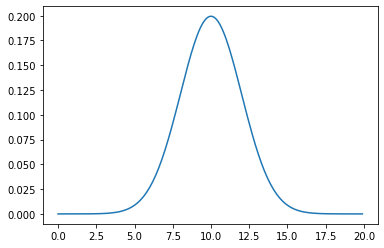

what is the probability of drawing a number <=15.0 ? 0.9937903346742238
quantiles: [0.025, 0.5, 0.975] -> [ 6.08007203 10.         13.91992797]


In [33]:
#  pdf: Probability Density Function
# I know this is not the plotting lesson, but here is a small recipe to plot the distribution
import matplotlib.pyplot as plt 
X = np.arange(0,20,0.1)
plt.plot( X , N.pdf(X) )
plt.show()

#    cdf: Cumulative Distribution Function
print('what is the probability of drawing a number <=15.0 ?' ,  N.cdf(15.0)) 


#    ppf: Percent Point Function (Inverse of CDF) , gives the quantiles of the distribution
P = [0.025,0.5,0.975]
Q = N.ppf(P)
print( 'quantiles:', P , '->' , Q )


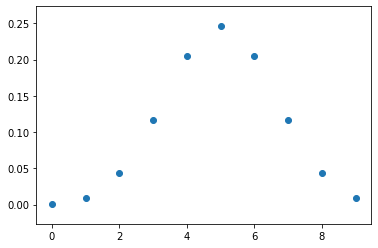

In [42]:
# For discrete distribution these rules change a bit , the pdf function is replaced by pmf:
X = np.arange(0,10)
plt.scatter( X , stats.binom.pmf( X ,  n = 10 , p = 0.5 ) ) # binomial distribution with 10 draws and a 0.5 probability of success
plt.show()

## statistical tests

`scipy.stats` implements a number of statistical tests as functions.

Most return two values : the computed test statistic and the p-value.

We will only demonstrate a couple tests here.
You can get a more in-depth explaination and demonstration of scipy.stats tests [there](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)



In [50]:
#Imagine we have two samples of measurement drawn from 2 sub-population :
sample1 = stats.norm.rvs(size = 93 , loc = 173 , scale = 20)
sample2 = stats.norm.rvs(size = 132 , loc = 181 , scale = 20)

# we perform a t-test to test the equality of the means
statistic , pValue = stats.ttest_ind(sample1 , sample2) 
significanceThreshold = 0.05
if pValue < significanceThreshold:
    print( "We reject the hypothesis of equality of means(H0). p-value :" , pValue )
else:
    print( "We do not reject the hypothesis of equality of means(H0). p-value :" , pValue )


We reject the hypothesis of equality of means(H0). p-value : 0.0011955595116142342


`stats.ttest_ind` has a `equal_var` parameter that one can set to `False` in order to perform Welsch's t-test, which is warranted when one cannot assume the two sub-population's variances to be equal.

> In general, these functions have a very good documentation, detailing the tests and giving usage examples. We heartily recommend any would-be users to have a read at the `help()`.

In [62]:
# Example of the Chi-Squared Test
# imagine you count different cell types in two biopsies and report them in a list :
biopsy1 = np.array([135 , 423 , 24 , 72])
biopsy2 = [184 , 552 , 77 , 101]

table = [biopsy1 , biopsy2]

stat, pValue, degreeOfFreedom, expectedValues = stats.chi2_contingency(table)
print('Chi-square test of independence of variables')
print('stat=%.3f, degree of  freedom=%i , p-value=%.3f' % (stat, degreeOfFreedom,  pValue))
# here the two biopsies seem to differ significatively in their composition


Chi-square test of independence of variables
stat=14.555, degree of  freedom=3 , p-value=0.002


### statiscial modelling and regression

`scipy` implements methods to fit a model to some data. 

`scipy.stats` proposes a simple linear regression function between two variable,
while `scipy.optimize` implements functions to fit (non-linear) models to data.

slope: 1.618178    intercept: -13.018001
R-squared: 0.526027
p-value for the slope: 0.000006


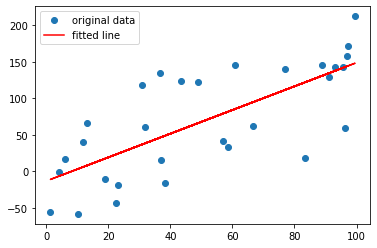

In [75]:

x = stats.uniform.rvs(size=30 , loc=0 , scale=100) # generating X
y = 1.6*x  + stats.norm.rvs(size=30 , loc=0 , scale=50) # Y = 1.6 * X + some noise
    
# Perform the linear regression:
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("p-value for the slope: %f" % p_value)

#   Plot the data along with the fitted line:
    
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()




parameter estimates          : [5.33171291 0.18878757 0.21927505 0.08021771]
parameter standard deviation : [0.26920328 0.02583608 0.29269083 0.02316083]

relative estimation error    : [0.06634258 0.05606215 0.56144989 0.1978229 ]


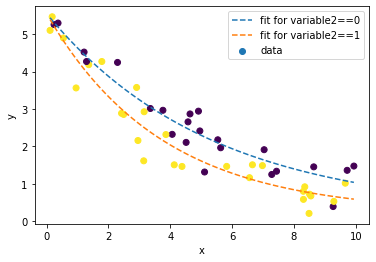

In [133]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


## example with 2 explanatory variables


# we define the model as a function.
# here it is a form of exponential decay model 
# where variable1 is the time and the rate of decay changes with variable2
# the model function takes as argument the 2 explanatory variable (grouped in a single tuple), and the 4 parameters
def func(X , a, b, c , d):
    x0 , x1 = X
    return a * np.exp( -(b + d*x1 ) * x0 ) + c 

#realParameter values
realParams = [ 5, 0.2, 0.5,  0.1 ]

# we simulate some data, with some noise
n=50 # number of points
variable1 = stats.uniform.rvs(size =n , loc = 0 , scale = 10 ) # explanatory variable number 1 : some uniform variable
variable2 = stats.bernoulli.rvs(size=n , p=0.5) # explanatory variable number 2 : can be 0 or 1

y = func( (variable1 , variable2) , realParams[0], realParams[1], realParams[2],  realParams[3])
y_noise = stats.norm.rvs(size=n , scale = 0.4) 
ydata = y+y_noise


popt, pcov = curve_fit(func, (variable1 , variable2), ydata)
perr = np.sqrt(np.diag(pcov))
print('parameter estimates          :',popt)
print('parameter standard deviation :',perr)
print('\nrelative estimation error    :',np.abs(popt - realParams)/realParams )


plt.scatter(variable1, ydata, c=variable2 , label='data')

x = np.linspace(min(variable1) , max(variable1) , 100)
plt.plot(x, func( ( x , np.zeros(100) )  , *popt), '--' ,  label='fit for variable2==0')
plt.plot(x, func( ( x , np.ones(100) )  , *popt), '--' , label='fit for variable2==1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



> You can find most of what was discussed here and more in the [official tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

# Exercise

1. Load the data in thefile "sample_data.tsv" as a numpy array
2. Log-transform the data
3. Find the row-wise means for replicates of Sample1 and Sample2
4. Find the row-wise standard deviations the same way as means
5. Use a function *scipy.stats.ttest_ind* to calculate p-value for every row
6. Select p-values which are smaller than $10^{-2}$
7. Print how many P-values below $10^{-2}$ are found

In [62]:
# use of ttest_ind function
import scipy.stats as sps

# two arrays of random numbers
a = np.random.randn(3,5) * 3 + 15
b = np.random.randn(3,8) * 2 + 5

print(sps.ttest_ind(a, b, axis=1, equal_var=False).pvalue)

[  1.19127275e-02   7.65848100e-04   2.37491470e-05]


In [63]:
!head -3 test_data.tab

sample1.1	sample1.2	sample1.3	sample1.4	sample2.1	sample2.2	sample2.3	sample2.4
6.801411216875708305e+02	5.565263845884210241e+02	2.525828159262368047e+02	2.956703139364956314e+02	9.604893343325777550e+02	4.193181331491081210e+02	3.126077132320110081e+02	8.246976543530363415e+02
5.874671746889415545e+02	4.128408625270991479e+02	4.378621470916139060e+02	6.736096888155080933e+02	7.240856598618292992e+02	4.807175238900777003e+02	4.731265298940686534e+02	5.216420065104225614e+02
